# Dog Breeds
## Tidy Tuesday

Richard Bamattre
2024-10-08

In [16]:
import pandas as pd

StatementMeta(sandyspark2, 27, 16, Finished, Available, Finished)

In [17]:
breed_traits = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-02-01/breed_traits.csv')

trait_description = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-02-01/trait_description.csv')

breed_rank_all = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-02-01/breed_rank.csv')


StatementMeta(sandyspark2, 27, 17, Finished, Available, Finished)

In [18]:
breed_traits.shape

StatementMeta(sandyspark2, 27, 18, Finished, Available, Finished)

(195, 17)

In [19]:
trait_description.shape

StatementMeta(sandyspark2, 27, 19, Finished, Available, Finished)

(16, 4)

In [20]:
breed_rank_all.shape

StatementMeta(sandyspark2, 27, 20, Finished, Available, Finished)

(195, 11)

In [21]:
display(breed_traits)

StatementMeta(sandyspark2, 27, 21, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 4608cbd0-785e-4bee-835f-9db993e30a3a)

In [22]:
display(trait_description)

StatementMeta(sandyspark2, 27, 22, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 94092360-9776-44da-ab03-f3a65dd646aa)

In [23]:
display(breed_rank_all)

StatementMeta(sandyspark2, 27, 23, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, f8ed2a2f-a224-4ebd-b80f-7bbeb5a034db)

In [24]:
breed_rank_all.columns

StatementMeta(sandyspark2, 27, 24, Finished, Available, Finished)

Index(['Breed', '2013 Rank', '2014 Rank', '2015 Rank', '2016 Rank',
       '2017 Rank', '2018 Rank', '2019 Rank', '2020 Rank', 'links', 'Image'],
      dtype='object')

In [25]:
# need to pivot ranks

rank = breed_rank_all.melt(id_vars = ['Breed', 'links', 'Image'], value_name = 'rank')

rank['year'] = rank['variable'].str.replace(' Rank', '')
rank['year'] = pd.to_numeric(rank['year'])

rank = rank.drop('variable', axis = 1)

rank

StatementMeta(sandyspark2, 27, 25, Finished, Available, Finished)

,Breed,links,Image,rank,year
0,Retrievers (Labrador),https://www.akc.org/dog-breeds/labrador-retrie...,https://www.akc.org/wp-content/uploads/2017/11...,1.0,2013
1,French Bulldogs,https://www.akc.org/dog-breeds/french-bulldog/,https://www.akc.org/wp-content/uploads/2017/11...,11.0,2013
2,German Shepherd Dogs,https://www.akc.org/dog-breeds/german-shepherd...,https://www.akc.org/wp-content/uploads/2017/11...,2.0,2013
3,Retrievers (Golden),https://www.akc.org/dog-breeds/golden-retriever/,https://www.akc.org/wp-content/uploads/2017/11...,3.0,2013
4,Bulldogs,https://www.akc.org/dog-breeds/bulldog/,https://www.akc.org/wp-content/uploads/2017/11...,5.0,2013
...,...,...,...,...,...
1555,Cesky Terriers,https://www.akc.org/dog-breeds/cesky-terrier/,https://www.akc.org/wp-content/uploads/2017/11...,191.0,2020
1556,American Foxhounds,https://www.akc.org/dog-breeds/american-foxhound/,https://www.akc.org/wp-content/uploads/2017/11...,192.0,2020
1557,Azawakhs,https://www.akc.org/dog-breeds/azawakh/,https://www.akc.org/wp-content/uploads/2017/11...,193.0,2020
1558,English Foxhounds,https://www.akc.org/dog-breeds/english-foxhound/,https://www.akc.org/wp-content/uploads/2017/11...,194.0,2020


In [26]:
# get the top rank per breed

top_rank = rank.groupby('Breed').agg({'rank': 'min'})

top_rank.sort_values('rank')

StatementMeta(sandyspark2, 27, 26, Finished, Available, Finished)

,rank
Breed,
Retrievers (Labrador),1.0
German Shepherd Dogs,2.0
French Bulldogs,2.0
Retrievers (Golden),3.0
Beagles,4.0
...,...
English Foxhounds,177.0
Cirnechi dell Etna,179.0
Grand Basset Griffon Vendeens,188.0


In [27]:
# get top 10 per year

top10 = top_rank[top_rank['rank'] <= 10]

top10.sort_values('rank')

StatementMeta(sandyspark2, 27, 27, Finished, Available, Finished)

,rank
Breed,
Retrievers (Labrador),1.0
German Shepherd Dogs,2.0
French Bulldogs,2.0
Retrievers (Golden),3.0
Beagles,4.0
Bulldogs,4.0
Yorkshire Terriers,6.0
Poodles,6.0
Boxers,7.0


In [28]:
top10.index

StatementMeta(sandyspark2, 27, 28, Finished, Available, Finished)

Index(['Beagles', 'Boxers', 'Bulldogs', 'Dachshunds', 'French Bulldogs',
       'German Shepherd Dogs', 'Pembroke Welsh Corgis',
       'Pointers (German Shorthaired)', 'Poodles', 'Retrievers (Golden)',
       'Retrievers (Labrador)', 'Rottweilers', 'Yorkshire Terriers'],
      dtype='object', name='Breed')

StatementMeta(sandyspark2, 27, 29, Finished, Available, Finished)

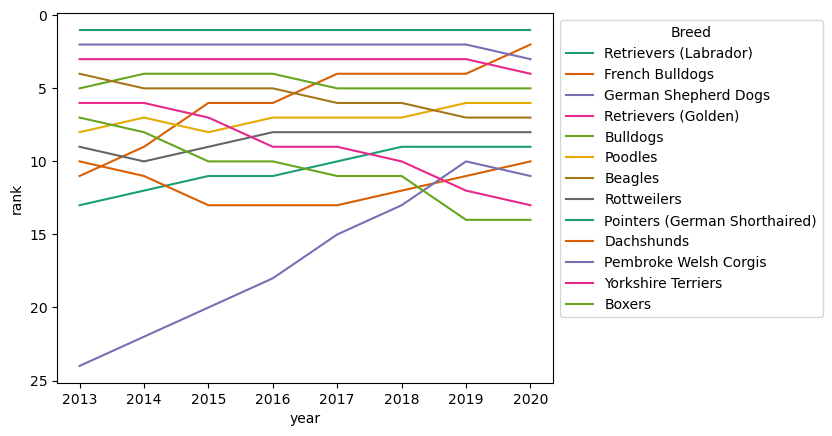

In [29]:
import seaborn as sns

# get full data, but only for top 10 breeds

plot_data = rank[rank['Breed'].isin(top10.index)]

g = sns.lineplot(plot_data, x = 'year', y = 'rank', hue = 'Breed', palette = "Dark2")

g.invert_yaxis()

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

In [31]:
traits_top10 = breed_traits.loc[breed_traits['Breed'].isin(plot_data['Breed'])]

# there's not a clear matchup between the traits and ranks?
# especially when there are characters

traits_top10

StatementMeta(sandyspark2, 27, 31, Finished, Available, Finished)

,Breed,Affectionate With Family,Good With Young Children,Good With Other Dogs,Shedding Level,Coat Grooming Frequency,Drooling Level,Coat Type,Coat Length,Openness To Strangers,Playfulness Level,Watchdog/Protective Nature,Adaptability Level,Trainability Level,Energy Level,Barking Level,Mental Stimulation Needs
4,Bulldogs,4,3,3,3,3,3,Smooth,Short,4,4,3,3,4,3,2,3
5,Poodles,5,5,3,1,4,1,Curly,Long,5,5,5,4,5,4,4,5
6,Beagles,3,5,5,3,2,1,Smooth,Short,3,4,2,4,3,4,4,4
7,Rottweilers,5,3,3,3,1,3,Smooth,Short,3,4,5,4,5,3,1,5
9,Dachshunds,5,3,4,2,2,2,Smooth,Short,4,4,4,4,4,3,5,3
13,Boxers,4,5,3,2,2,3,Smooth,Short,4,4,4,3,4,4,3,4


StatementMeta(sandyspark2, 27, 32, Finished, Available, Finished)

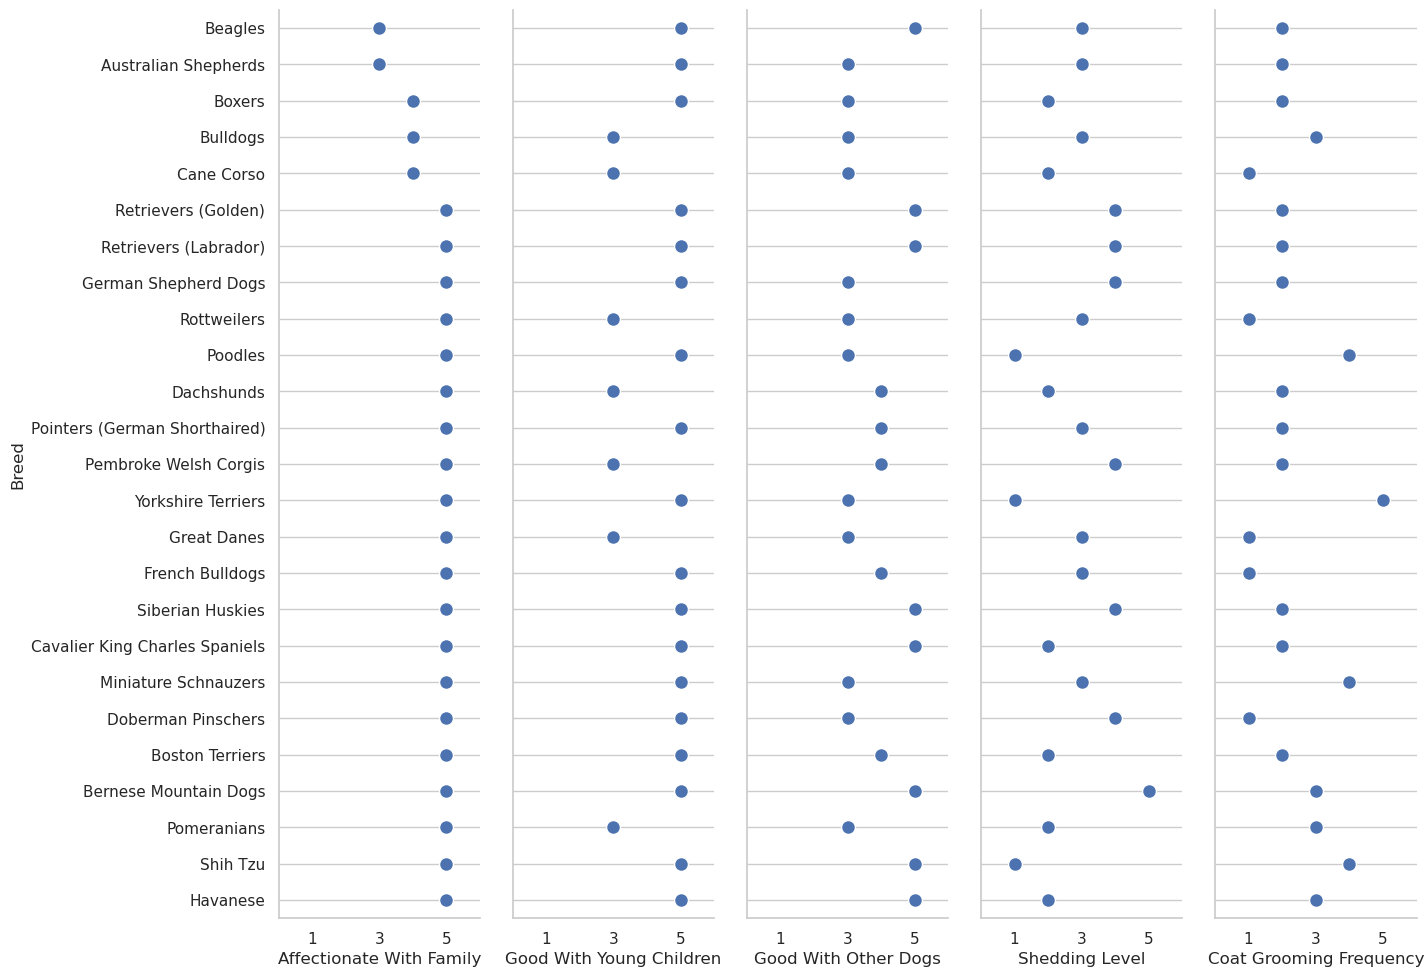

In [32]:
# this looks like a manageable way to plot variables among many breeds:
# https://seaborn.pydata.org/examples/pairgrid_dotplot.html

traits_head = breed_traits.head(n = 25)

sns.set_theme(style="whitegrid")

g = sns.PairGrid(traits_head.sort_values('Affectionate With Family'), x_vars = traits_top10.columns[1:6], y_vars = 'Breed', height = 10, aspect = .25)

g.map(sns.stripplot, size = 10, orient = 'h', linewidth = 1, edgecolor = 'w')

g.set(xlim = (0, 6))

for ax in g.axes.flat:

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

    # Set x axis labels
    ax.set_xticks([1, 3, 5])

g

StatementMeta(sandyspark2, 27, 33, Finished, Available, Finished)

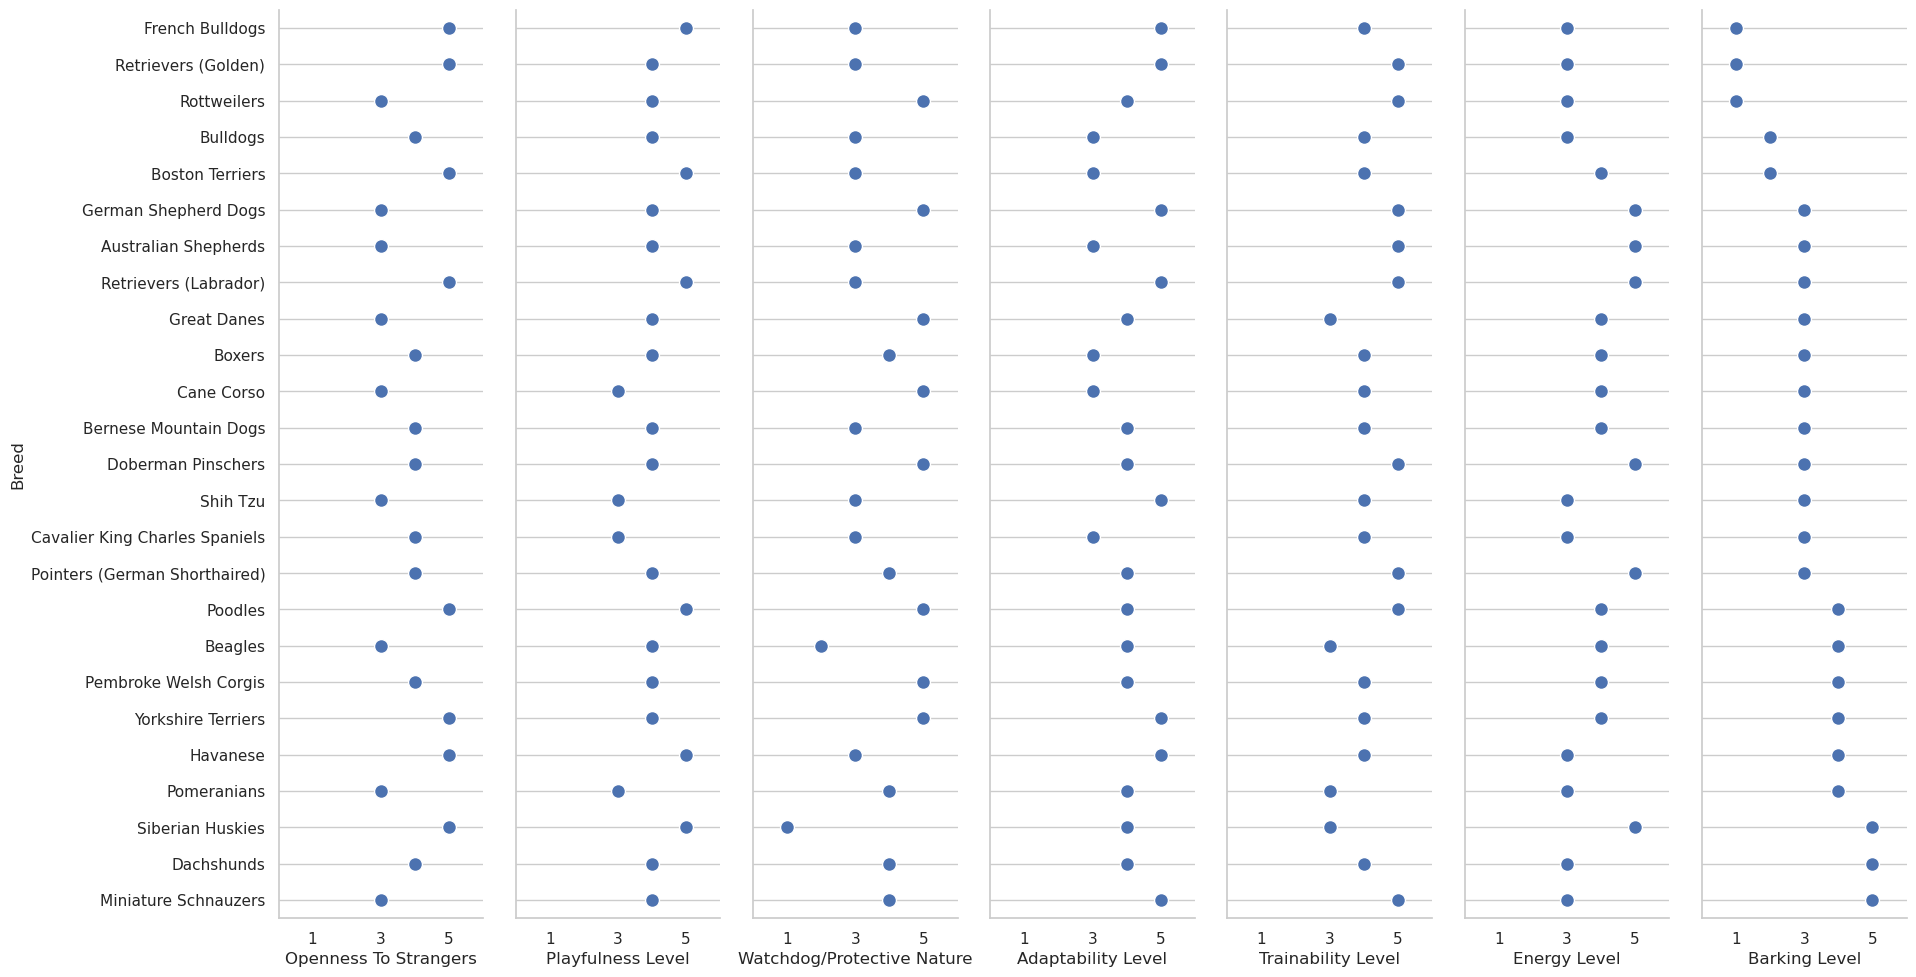

In [33]:
# use for other variables

g = sns.PairGrid(traits_head.sort_values('Barking Level'), x_vars = traits_top10.columns[9:16], y_vars = 'Breed', height = 10, aspect = .25)

g.map(sns.stripplot, size = 10, orient = 'h', linewidth = 1, edgecolor = 'w')

g.set(xlim = (0, 6))

for ax in g.axes.flat:

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

    # Set x axis labels
    ax.set_xticks([1, 3, 5])

g

StatementMeta(sandyspark2, 27, 34, Finished, Available, Finished)

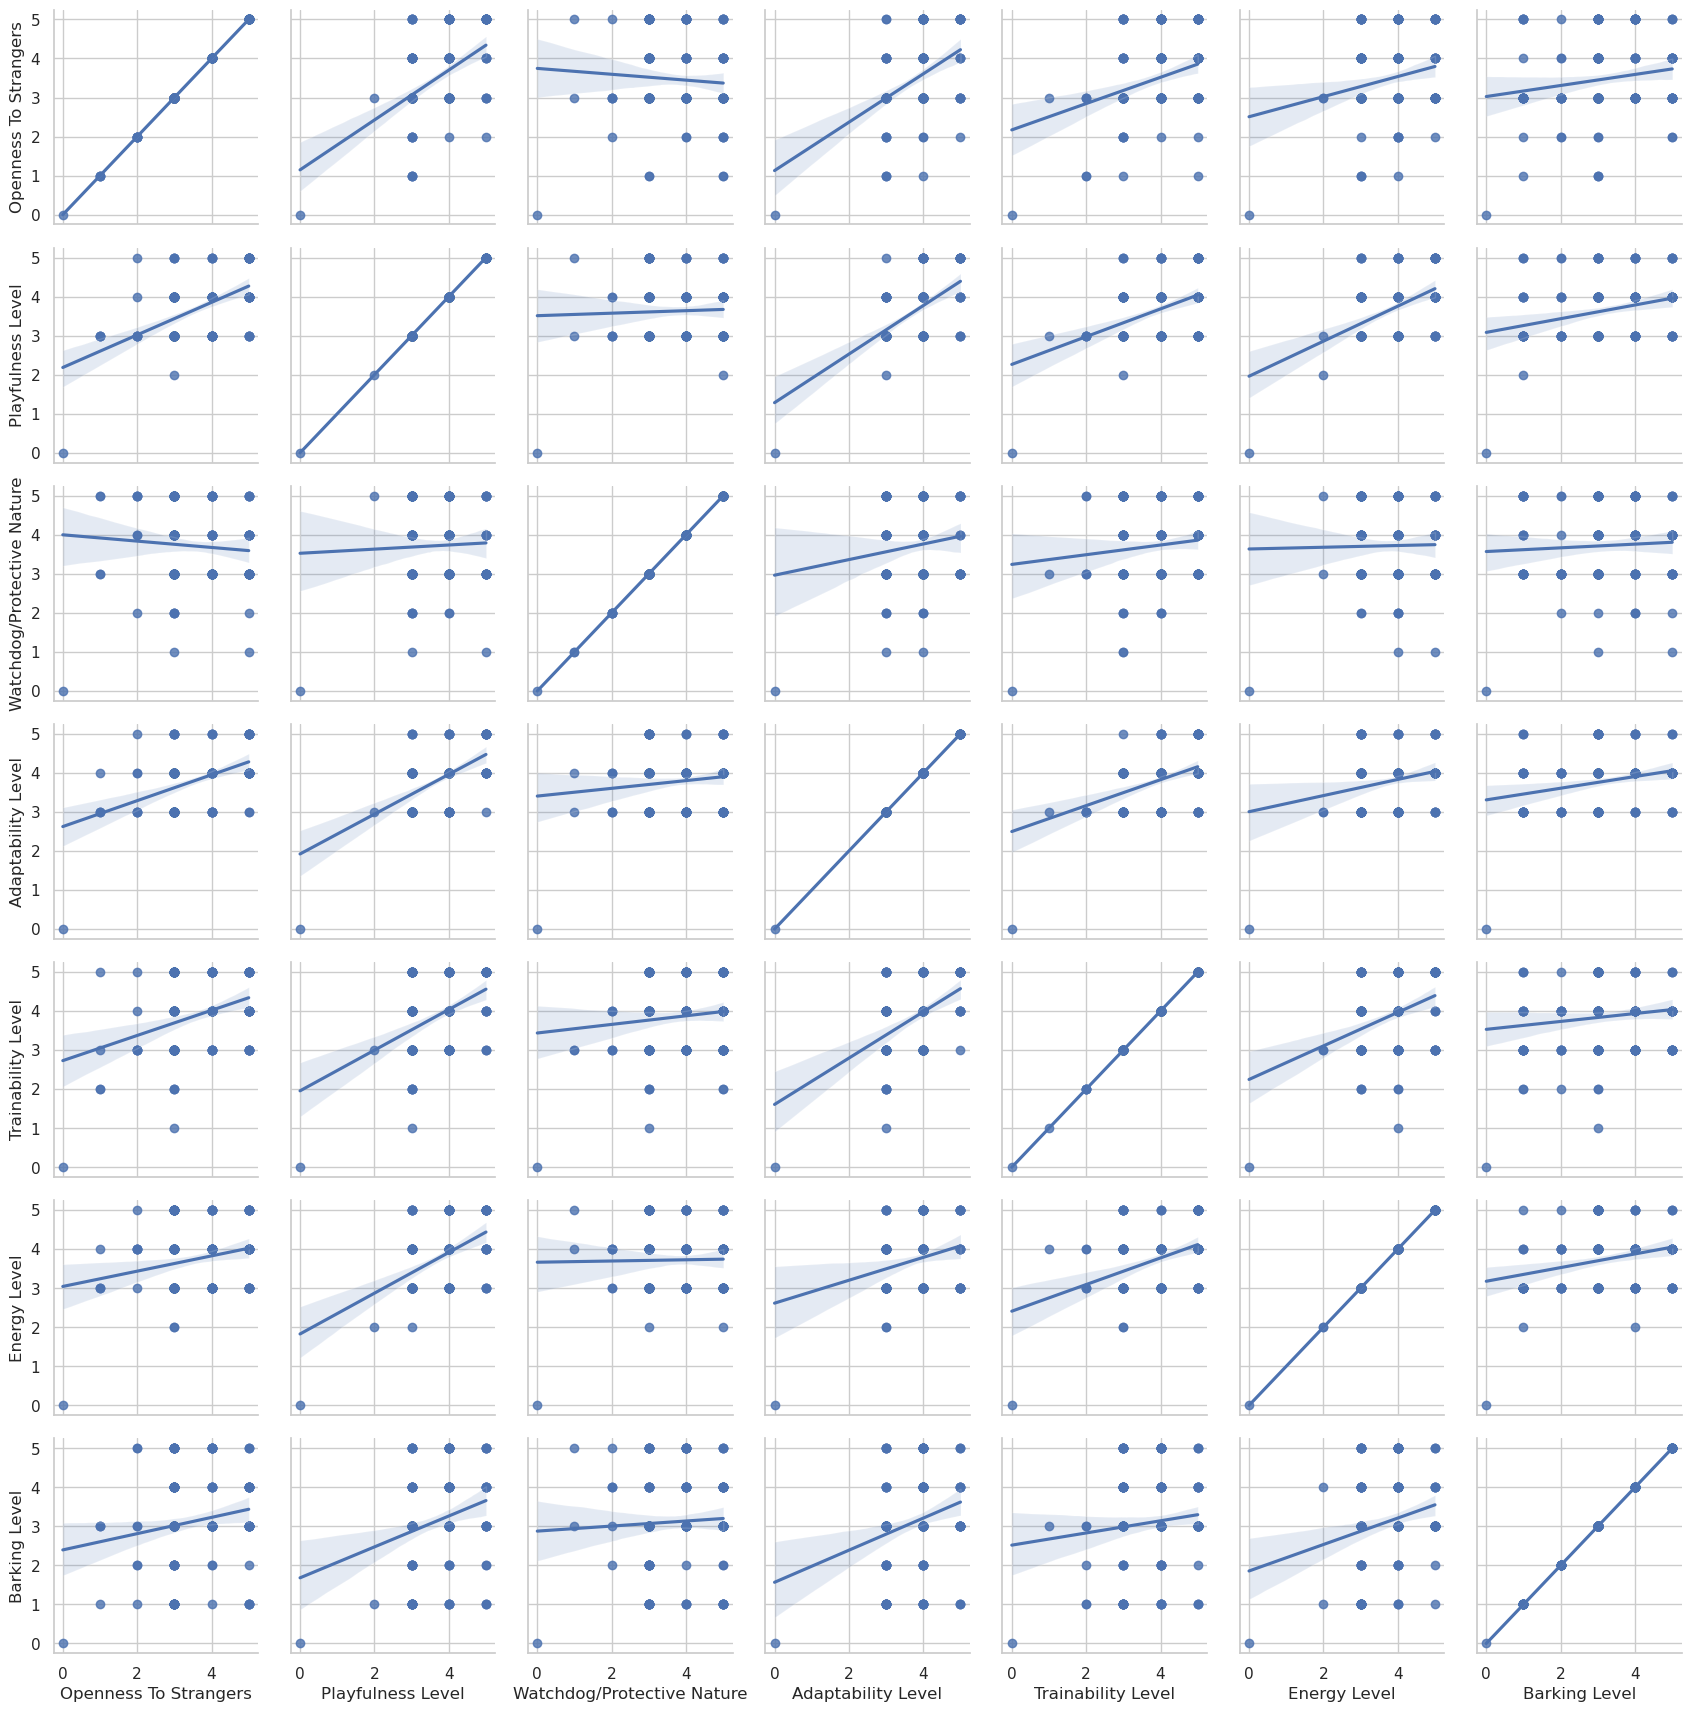

In [34]:
# more classical use of PairGrid - scatterplot

g = sns.PairGrid(breed_traits.iloc[:, 9:16])

g.map(sns.regplot)

StatementMeta(sandyspark2, 27, 35, Finished, Available, Finished)

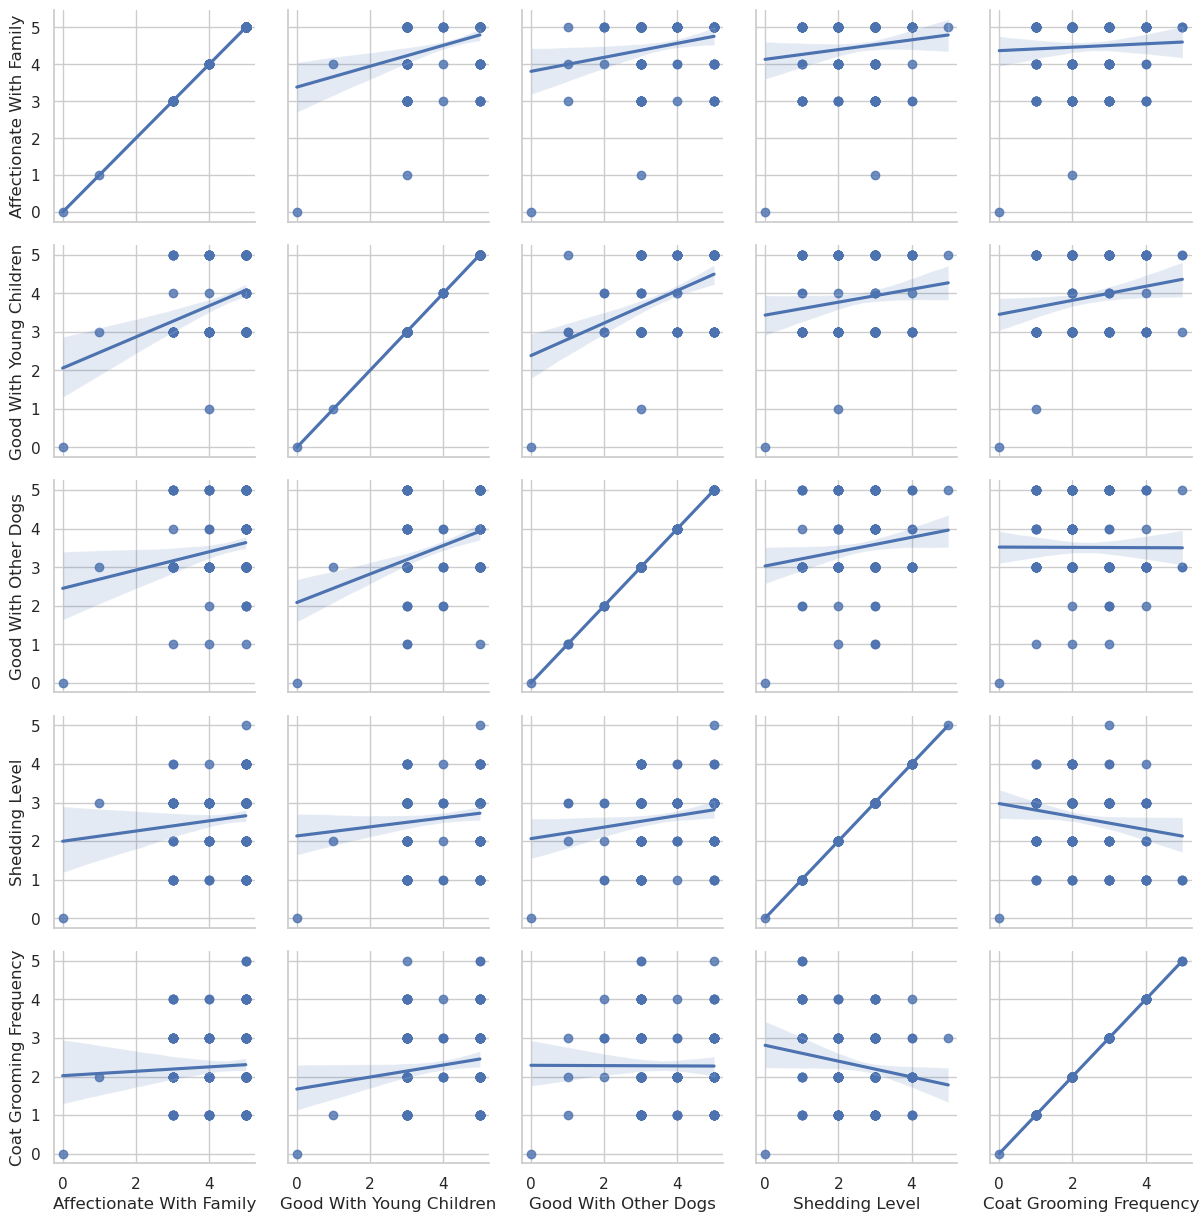

In [35]:
# more classical use of PairGrid - scatterplot

g = sns.PairGrid(breed_traits.iloc[:, 1:6])

g.map(sns.regplot)

## Clustering

In [36]:
breeds = breed_traits.drop(columns = ['Coat Type', 'Coat Length']) # drop non-numeric columns

breeds

StatementMeta(sandyspark2, 27, 36, Finished, Available, Finished)

,Breed,Affectionate With Family,Good With Young Children,Good With Other Dogs,Shedding Level,Coat Grooming Frequency,Drooling Level,Openness To Strangers,Playfulness Level,Watchdog/Protective Nature,Adaptability Level,Trainability Level,Energy Level,Barking Level,Mental Stimulation Needs
0,Retrievers (Labrador),5,5,5,4,2,2,5,5,3,5,5,5,3,4
1,French Bulldogs,5,5,4,3,1,3,5,5,3,5,4,3,1,3
2,German Shepherd Dogs,5,5,3,4,2,2,3,4,5,5,5,5,3,5
3,Retrievers (Golden),5,5,5,4,2,2,5,4,3,5,5,3,1,4
4,Bulldogs,4,3,3,3,3,3,4,4,3,3,4,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Cesky Terriers,4,5,3,2,2,1,4,3,3,4,3,3,3,3
191,American Foxhounds,3,5,5,3,1,1,3,3,3,3,3,4,5,3
192,Azawakhs,3,3,3,2,2,1,1,3,3,3,2,3,1,3
193,English Foxhounds,5,5,5,3,1,2,4,4,3,4,4,4,5,4


In [37]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, random_state = 0, n_init = 'auto').fit(breeds.drop('Breed', axis = 1))

StatementMeta(sandyspark2, 27, 37, Finished, Available, Finished)

In [38]:
breeds['kmean'] = kmeans.labels_

breeds

StatementMeta(sandyspark2, 27, 38, Finished, Available, Finished)

,Breed,Affectionate With Family,Good With Young Children,Good With Other Dogs,Shedding Level,Coat Grooming Frequency,Drooling Level,Openness To Strangers,Playfulness Level,Watchdog/Protective Nature,Adaptability Level,Trainability Level,Energy Level,Barking Level,Mental Stimulation Needs,kmean
0,Retrievers (Labrador),5,5,5,4,2,2,5,5,3,5,5,5,3,4,3
1,French Bulldogs,5,5,4,3,1,3,5,5,3,5,4,3,1,3,3
2,German Shepherd Dogs,5,5,3,4,2,2,3,4,5,5,5,5,3,5,2
3,Retrievers (Golden),5,5,5,4,2,2,5,4,3,5,5,3,1,4,3
4,Bulldogs,4,3,3,3,3,3,4,4,3,3,4,3,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Cesky Terriers,4,5,3,2,2,1,4,3,3,4,3,3,3,3,0
191,American Foxhounds,3,5,5,3,1,1,3,3,3,3,3,4,5,3,3
192,Azawakhs,3,3,3,2,2,1,1,3,3,3,2,3,1,3,1
193,English Foxhounds,5,5,5,3,1,2,4,4,3,4,4,4,5,4,3


In [39]:
# conduct PCA for mapping

from sklearn.decomposition import PCA

pca = PCA(n_components = 2).fit_transform(breeds.drop('Breed', axis = 1))

StatementMeta(sandyspark2, 27, 39, Finished, Available, Finished)

In [40]:
pd.DataFrame(pca)

StatementMeta(sandyspark2, 27, 40, Finished, Available, Finished)

,0,1
0,-3.584156,-0.277238
1,-2.085277,1.624117
2,-1.867023,-0.724972
3,-2.674664,1.197552
4,-0.408992,2.480844
...,...,...
190,1.536155,-1.099534
191,-0.351283,0.615336
192,3.734035,1.713031
193,-2.346477,-0.246186


In [41]:
breeds_final = pd.merge(breeds, pd.DataFrame(pca), left_index = True, right_index = True)

breeds_final['image'] = breed_rank_all['Image']

breeds_final

StatementMeta(sandyspark2, 27, 41, Finished, Available, Finished)

,Breed,Affectionate With Family,Good With Young Children,Good With Other Dogs,Shedding Level,Coat Grooming Frequency,Drooling Level,Openness To Strangers,Playfulness Level,Watchdog/Protective Nature,Adaptability Level,Trainability Level,Energy Level,Barking Level,Mental Stimulation Needs,kmean,0,1,image
0,Retrievers (Labrador),5,5,5,4,2,2,5,5,3,5,5,5,3,4,3,-3.584156,-0.277238,https://www.akc.org/wp-content/uploads/2017/11...
1,French Bulldogs,5,5,4,3,1,3,5,5,3,5,4,3,1,3,3,-2.085277,1.624117,https://www.akc.org/wp-content/uploads/2017/11...
2,German Shepherd Dogs,5,5,3,4,2,2,3,4,5,5,5,5,3,5,2,-1.867023,-0.724972,https://www.akc.org/wp-content/uploads/2017/11...
3,Retrievers (Golden),5,5,5,4,2,2,5,4,3,5,5,3,1,4,3,-2.674664,1.197552,https://www.akc.org/wp-content/uploads/2017/11...
4,Bulldogs,4,3,3,3,3,3,4,4,3,3,4,3,2,3,4,-0.408992,2.480844,https://www.akc.org/wp-content/uploads/2017/11...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Cesky Terriers,4,5,3,2,2,1,4,3,3,4,3,3,3,3,0,1.536155,-1.099534,https://www.akc.org/wp-content/uploads/2017/11...
191,American Foxhounds,3,5,5,3,1,1,3,3,3,3,3,4,5,3,3,-0.351283,0.615336,https://www.akc.org/wp-content/uploads/2017/11...
192,Azawakhs,3,3,3,2,2,1,1,3,3,3,2,3,1,3,1,3.734035,1.713031,https://www.akc.org/wp-content/uploads/2017/11...
193,English Foxhounds,5,5,5,3,1,2,4,4,3,4,4,4,5,4,3,-2.346477,-0.246186,https://www.akc.org/wp-content/uploads/2017/11...


In [42]:
breeds_final.columns

StatementMeta(sandyspark2, 27, 42, Finished, Available, Finished)

Index([                     'Breed',   'Affectionate With Family',
         'Good With Young Children',       'Good With Other Dogs',
                   'Shedding Level',    'Coat Grooming Frequency',
                   'Drooling Level',      'Openness To Strangers',
                'Playfulness Level', 'Watchdog/Protective Nature',
               'Adaptability Level',         'Trainability Level',
                     'Energy Level',              'Barking Level',
         'Mental Stimulation Needs',                      'kmean',
                                  0,                            1,
                            'image'],
      dtype='object')

StatementMeta(sandyspark2, 27, 43, Finished, Available, Finished)

<Axes: xlabel='0', ylabel='1'>

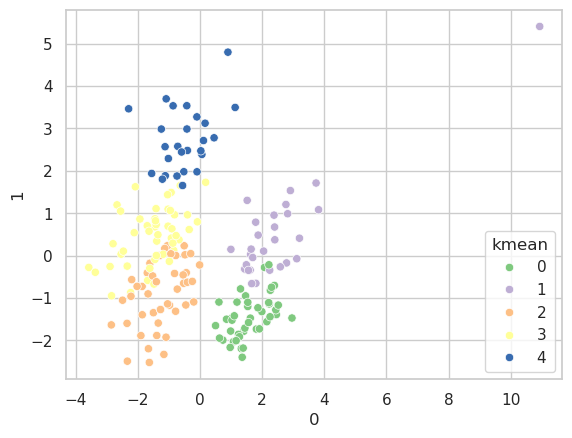

In [43]:
sns.scatterplot(breeds_final, x = 0, y = 1, hue = 'kmean', palette = 'Accent')

In [44]:
breeds_head = breeds_final.head(n = 25)

#breeds_final.iloc(breeds_final['kmean'] == 1).head(n = 25)

StatementMeta(sandyspark2, 27, 44, Finished, Available, Finished)

StatementMeta(sandyspark2, 27, 45, Finished, Available, Finished)

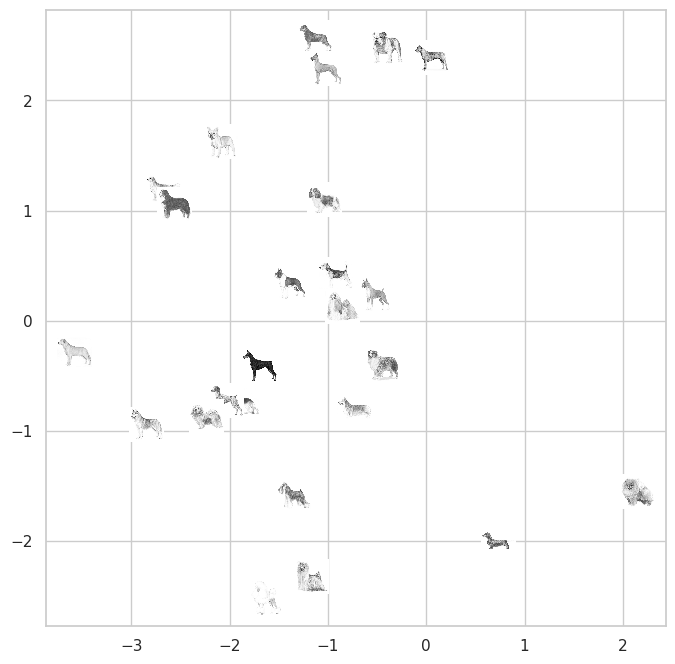

In [45]:
# use images of dogs
# https://stackoverflow.com/questions/22566284/matplotlib-how-to-plot-images-instead-of-points

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import requests

def getImage(path, zoom=.05):
    return OffsetImage(plt.imread(path, format = 'jpeg'), zoom=zoom)

paths = breeds_head['image']

x = breeds_head[0]
y = breeds_head[1]
color = breeds_head['kmean']

fig, ax = plt.subplots()
ax.scatter(x, y, c = color) 

for x0, y0, path in zip(x, y,paths):
    
    ab = AnnotationBbox(getImage(requests.get(path, stream = True).raw), (x0, y0), frameon=False)
    ax.add_artist(ab)

fig.set_size_inches(8, 8)